In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from plot_function import *
%matplotlib inline

results = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


What kinds of question are there in this survey?

In [2]:
def options_from_column(df, selected_column):
    """
    Sorts through responses from the selected column and finds all the options that were given to the respondent
    :param df: The data frame to check
    :param selected_column: The column to check
    :return: The list of unique options
    """
    options = []
    for row in set(df[selected_column].dropna()):
        selection = row.split("; ")
        diff = np.setdiff1d(selection, options)
        options += list(diff) if len(diff) > 0 else []
    return list(set(options))

In [3]:
bucket_size = 1
both_counts = {}
data_type = results.dtypes
for column_index, column in enumerate(results.columns):
    if column == "Respondent":
        continue
    if str(data_type[column_index]) == "float64":
            continue
    # if column != "DeveloperType":
    #     continue
    if results[column].str.contains(";").sum() == 0:
        number_of_options = len(list(set(results[column].dropna())))
        question_type = "single selection"
    else:
        question_type = "multiple selection"
        column_options = options_from_column(results, column)
        number_of_options = len(column_options)

    both_counts.setdefault(int(np.floor(number_of_options/bucket_size)*bucket_size), {})\
        .setdefault(question_type, [])\
        .append(results[column].count())

With these option counts I can bucket the response counts the same way I did with the question lengths

In [4]:
both_averages = {}
multi_averages = {}
single_averages = {}
for bucket in range(0, max(*list(both_counts.keys())) + bucket_size):
    multi_counts = both_counts.get(bucket, {}).get("multiple selection", [])
    single_counts = both_counts.get(bucket, {}).get("single selection", [])
    both = multi_counts + single_counts
    both_averages.setdefault(bucket, sum(both)/len(both) if both else 0)
    multi_averages.setdefault(bucket, sum(multi_counts)/len(multi_counts) if multi_counts else 0)
    single_averages.setdefault(bucket, sum(single_counts)/len(single_counts) if single_counts else 0)

C:\Users\killa\Documents\udacity ds nanodegree\project1\plot_function.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tickets, rotation=45)


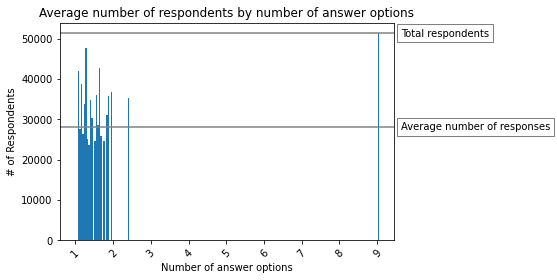

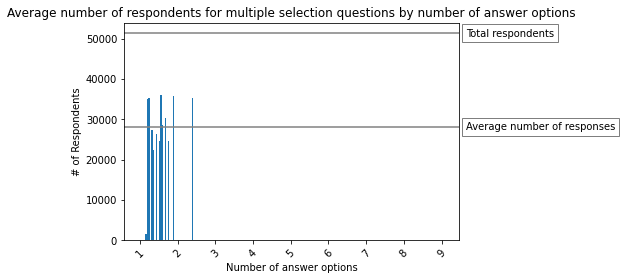

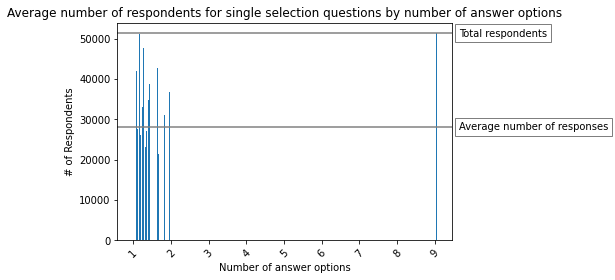

In [6]:
column_counts = results.count()
x_label = "Number of answer options"
plot_response_graph(
    both_averages, sum(column_counts)/len(column_counts), results.shape[0],
    title="Average number of respondents by number of answer options",
    x_label=x_label
)
plot_response_graph(
    multi_averages, sum(column_counts)/len(column_counts), results.shape[0],
    title="Average number of respondents for multiple selection questions by number of answer options",
    x_label=x_label
)
plot_response_graph(
    single_averages, sum(column_counts)/len(column_counts), results.shape[0],
    title="Average number of respondents for single selection questions by number of answer options",
    x_label=x_label
)